In [1]:
import karman
import torch
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from karman.nn import SimpleNN
from matplotlib.gridspec import GridSpec


In [2]:
model_path='tests/data/kml_model'

print('Loading Model')

model = SimpleNN().to(dtype=torch.float64)

state_dict = torch.load(os.path.join(model_path),map_location=torch.device('cpu'))['state_dict']
#Sanitize state_dict key names
for key in list(state_dict.keys()):
    if key.startswith('module'):
    # Model was saved as dataparallel model
        # Remove 'module.' from start of key
        state_dict[key[7:]] = state_dict.pop(key)
    else:
        continue
model.load_state_dict(state_dict)

Loading Model


/Users/ga00693/miniconda3/envs/karman/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [3]:
model_opt=torch.load('tests/data/kml_model',map_location=torch.device('cpu'))['opt']

In [5]:
with open('thermo_scaler.pickle', 'rb') as handle:
    thermo_scaler = pickle.load(handle)

with open('cyclical_feature_scaler.pickle', 'rb') as handle:
    cyclical_feature_scaler = pickle.load(handle)

with open('thermospheric_density_scaler.pickle', 'rb') as handle:
    thermospheric_density_scaler = pickle.load(handle)
    
dataset=karman.ThermosphericDensityDataset(
    directory='path/to/data',
    features_to_exclude_thermo=model_opt.features_to_exclude_thermo.split(','),
    create_cyclical_features=True,
    max_altitude=600000,
    thermo_scaler=thermo_scaler,
    cyclical_feature_scaler=cyclical_feature_scaler,
    thermospheric_density_scaler=thermospheric_density_scaler
)

Creating thermospheric density dataset
Creating cyclical features
['all__dates_datetime__', 'tudelft_thermo__ground_truth_thermospheric_density__[kg/m**3]', 'tudelft_thermo__satellite__', 'celestrack__ap_h_0__', 'celestrack__ap_h_1__', 'celestrack__ap_h_2__', 'celestrack__ap_h_3__', 'celestrack__ap_h_4__', 'celestrack__ap_h_5__', 'celestrack__ap_h_6__', 'celestrack__ap_average__', 'JB08__thermospheric_density__[kg/m**3]', 'NRLMSISE00__thermospheric_density__[kg/m**3]']
['all__day_of_year__[d]', 'all__seconds_in_day__[s]', 'all__sun_right_ascension__[rad]', 'all__sun_declination__[rad]', 'all__sidereal_time__[rad]', 'tudelft_thermo__longitude__[deg]', 'tudelft_thermo__local_solar_time__[h]']
Used features: Index(['all__year__[y]', 'tudelft_thermo__altitude__[m]',
       'tudelft_thermo__latitude__[deg]',
       'space_environment_technologies__f107_average__',
       'space_environment_technologies__f107_obs__',
       'space_environment_technologies__s107_obs__',
       'space_environm

In [31]:
#data.to_hdf('geomagnetic_storm.h5',key='stage',mode='w')

In [137]:
date_0=pd.to_datetime(datetime.date(2015,3,16))
date_1=pd.to_datetime(datetime.date(2015,3,19))

In [150]:
val=data['all__dates_datetime__']
subdata=data.loc[((val>date_0) & (val<date_1))]
date_0=pd.to_datetime(datetime.date(2011,3,16))
date_1=pd.to_datetime(datetime.date(2019,3,19))
subdata_2=data.loc[((val>date_0) & (val<date_1))]

In [202]:
date_st_patrick_0=pd.to_datetime(datetime.date(2015,3,17))
date_st_patrick_end=pd.to_datetime(datetime.date(2015,3,19))

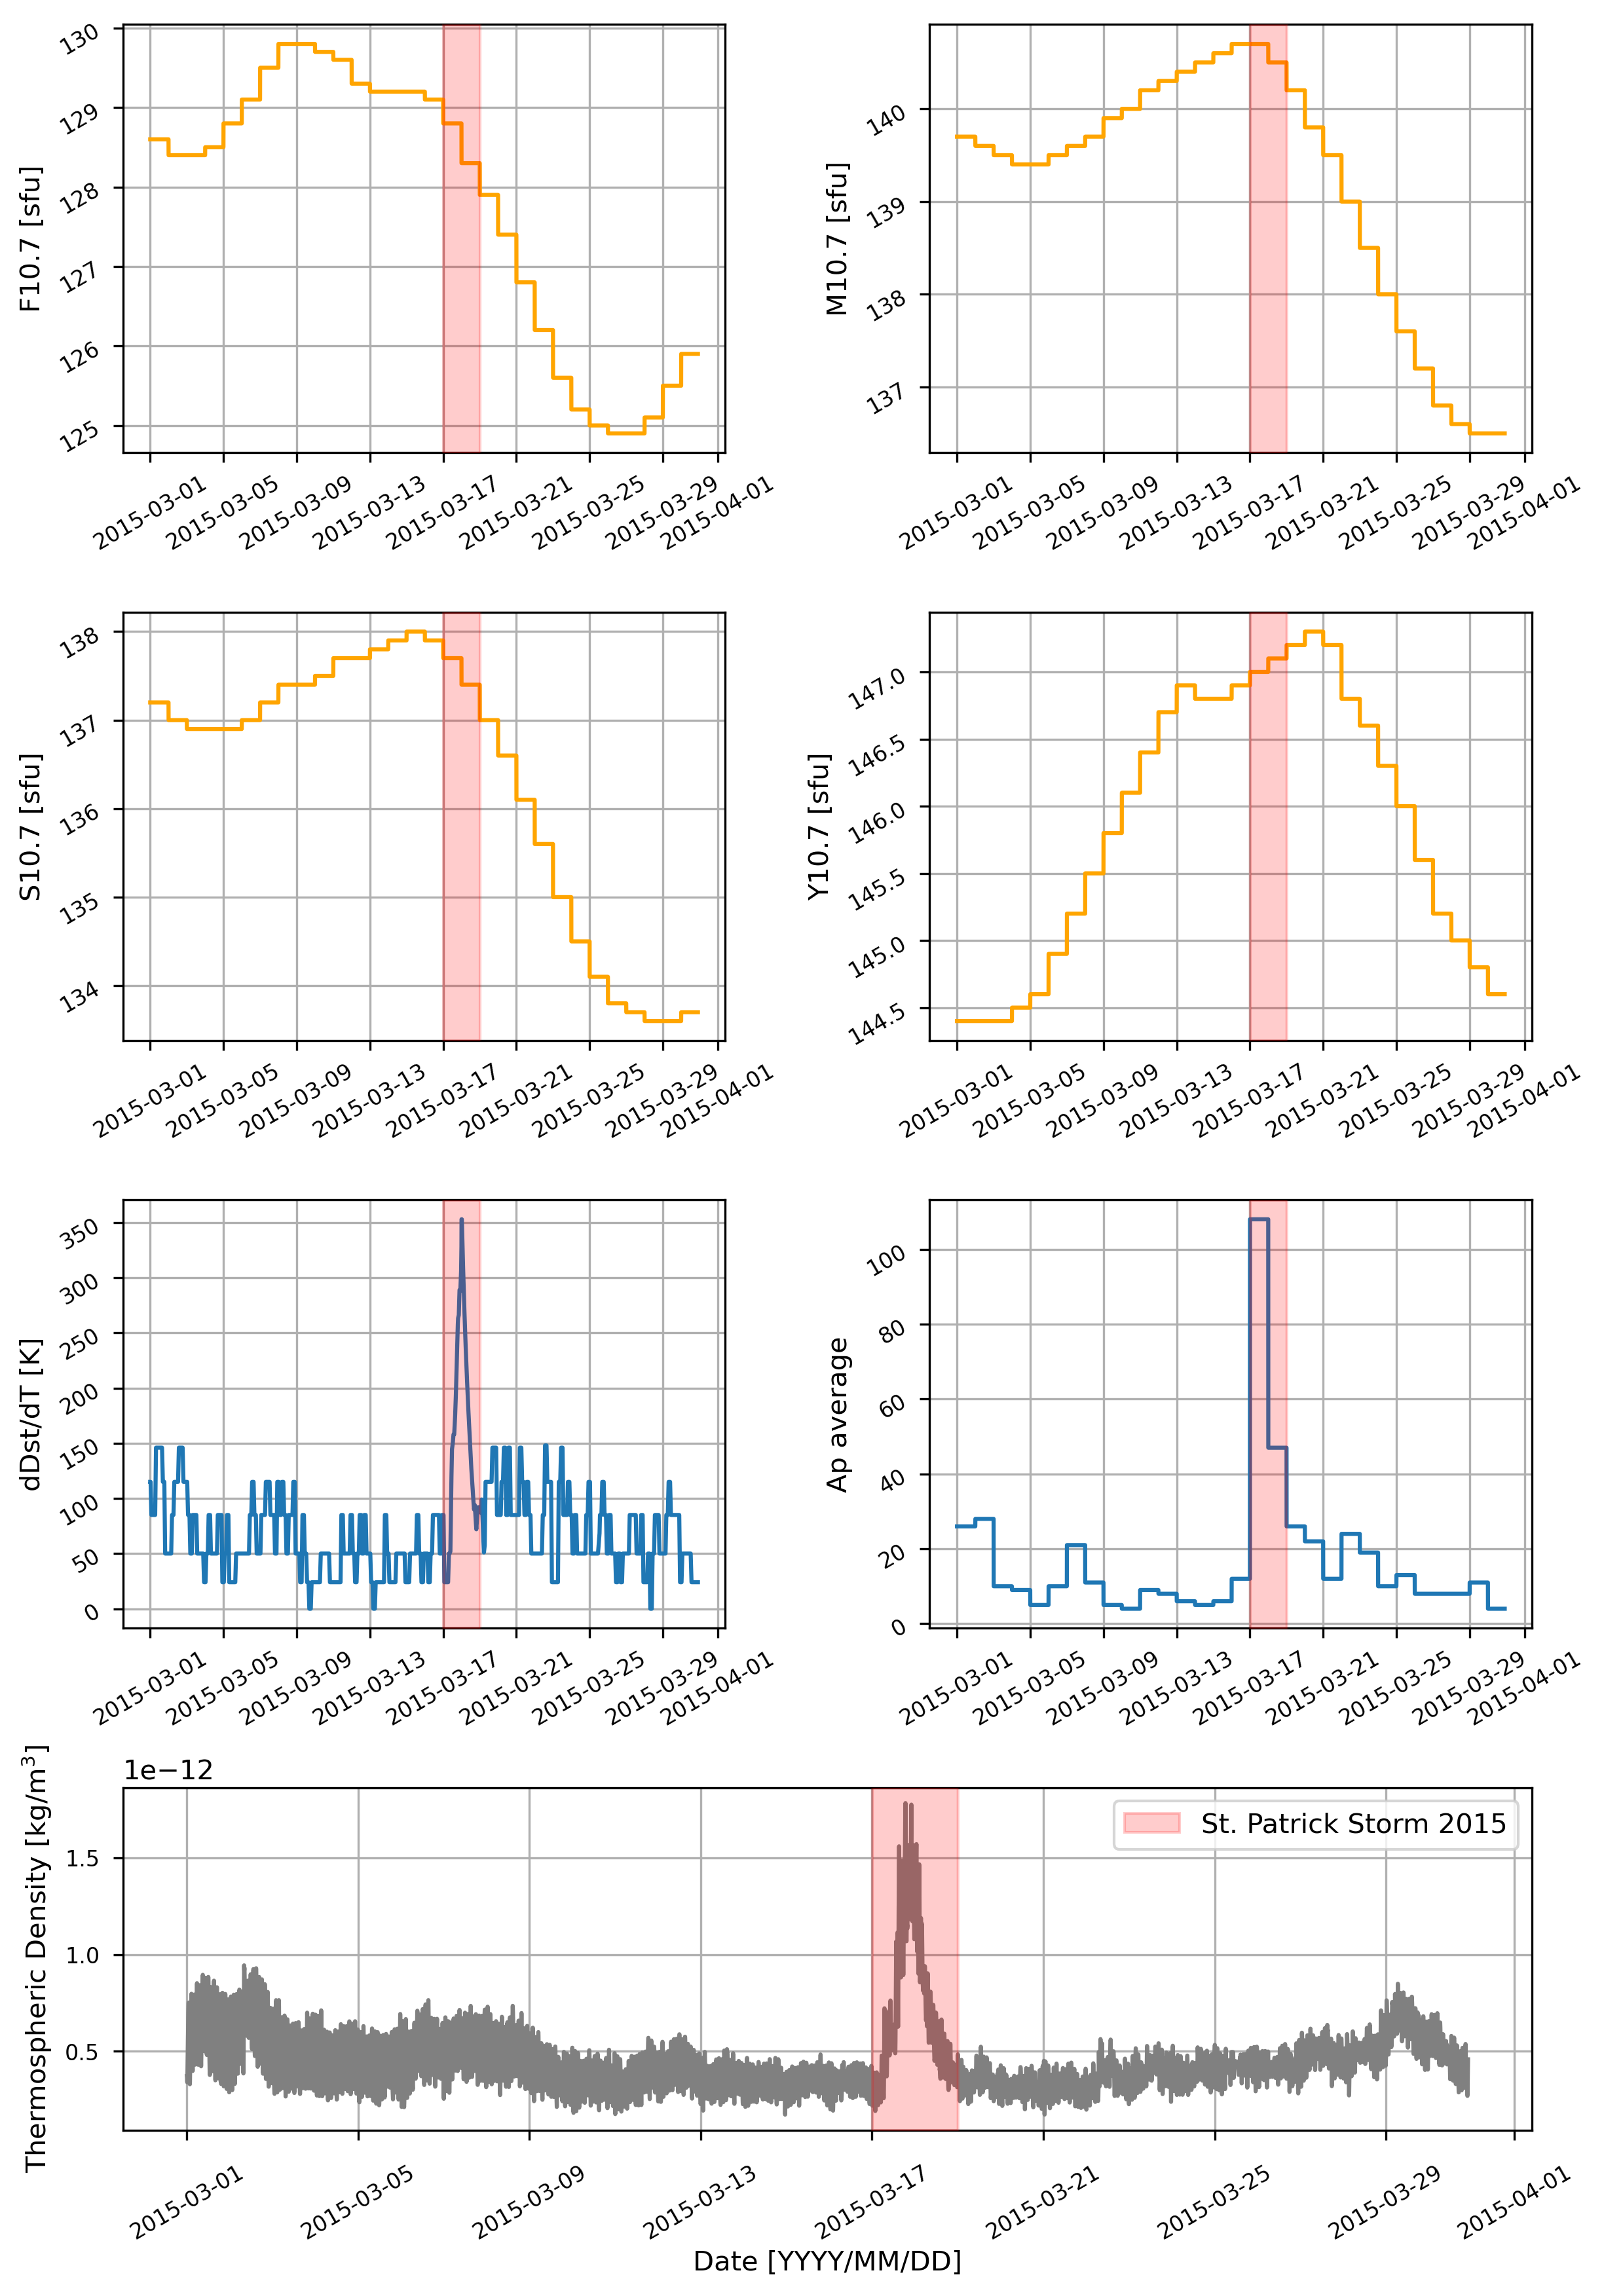

In [234]:
subdata_2=subdata_2[subdata_2['tudelft_thermo__satellite__']=='swarm_b']
subdata=subdata[subdata['tudelft_thermo__satellite__']=='swarm_b']
x_data=subdata['all__dates_datetime__'].values
x_data_2=subdata_2['all__dates_datetime__'].values
# Create the figure and axes using GridSpec
fig = plt.figure(figsize=(8.27, 11.69), dpi=300)
gs = GridSpec(4, 2, figure=fig, height_ratios=[1, 1, 1, 0.8])  # Adjust the last height ratio as desired

# First row
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(x_data_2, subdata_2['space_environment_technologies__f107_average__'].values,color='orange')
ax1.set_ylabel('F10.7 [sfu]')
ax1.tick_params(labelsize=8,labelrotation=30)
y_lim_min,y_lim_max=ax1.get_ylim()
ax1.fill_between(x_data_2, y2=y_lim_max,y1=y_lim_min, where=(x_data_2 >= date_st_patrick_0) & (x_data_2 <= date_st_patrick_end), color='red', alpha=0.2,zorder=3)
ax1.set_ylim((y_lim_min, y_lim_max))
ax1.grid()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(x_data_2, subdata_2['space_environment_technologies__m107_average__'].values,color='orange')
ax2.set_ylabel('M10.7 [sfu]')
ax2.tick_params(labelsize=8,labelrotation=30)
y_lim_min,y_lim_max=ax2.get_ylim()
ax2.fill_between(x_data_2, y2=y_lim_max,y1=y_lim_min, where=(x_data_2 >= date_st_patrick_0) & (x_data_2 <= date_st_patrick_end), color='red', alpha=0.2,zorder=3)
ax2.set_ylim((y_lim_min, y_lim_max))
ax2.grid()

# Second row
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(x_data_2, subdata_2['space_environment_technologies__s107_average__'].values,color='orange')
ax3.set_ylabel('S10.7 [sfu]')
ax3.tick_params(labelsize=8,labelrotation=30)
y_lim_min,y_lim_max=ax3.get_ylim()
ax3.fill_between(x_data_2, y2=y_lim_max,y1=y_lim_min, where=(x_data_2 >= date_st_patrick_0) & (x_data_2 <= date_st_patrick_end), color='red', alpha=0.2,zorder=3)
ax3.set_ylim((y_lim_min, y_lim_max))
ax3.grid()

ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(x_data_2, subdata_2['space_environment_technologies__y107_average__'].values,color='orange')
ax4.set_ylabel('Y10.7 [sfu]')
ax4.tick_params(labelsize=8,labelrotation=30)
y_lim_min,y_lim_max=ax4.get_ylim()
ax4.fill_between(x_data_2, y2=y_lim_max,y1=y_lim_min, where=(x_data_2 >= date_st_patrick_0) & (x_data_2 <= date_st_patrick_end), color='red', alpha=0.2,zorder=3)
ax4.set_ylim((y_lim_min, y_lim_max))
ax4.grid()

# Third row
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(x_data, subdata['JB08__d_st_dt__[K]'].values)
ax5.set_ylabel('dDst/dT [K]')
ax5.tick_params(labelsize=8,labelrotation=30)
y_lim_min,y_lim_max=ax5.get_ylim()
ax5.fill_between(x_data, y2=y_lim_max,y1=y_lim_min, where=(x_data >= date_st_patrick_0) & (x_data <= date_st_patrick_end), color='red', alpha=0.2,zorder=3)
ax5.set_ylim((y_lim_min, y_lim_max))
ax5.grid()

ax6 = fig.add_subplot(gs[2, 1])
ax6.plot(x_data, subdata['celestrack__ap_average__'].values)
ax6.set_ylabel('Ap average')
ax6.tick_params(labelsize=8,labelrotation=30)
y_lim_min,y_lim_max=ax6.get_ylim()
ax6.fill_between(x_data, y2=y_lim_max,y1=y_lim_min, where=(x_data >= date_st_patrick_0) & (x_data <= date_st_patrick_end), color='red', alpha=0.2,zorder=3)
ax6.set_ylim((y_lim_min, y_lim_max))
ax6.grid()

# Fourth row
ax7 = fig.add_subplot(gs[3, :])
ax7.plot(x_data, subdata['tudelft_thermo__ground_truth_thermospheric_density__[kg/m**3]'].values,color='grey')
ax7.set_ylabel('Thermospheric Density [kg/m$^3$]')
ax7.set_xlabel('Date [YYYY/MM/DD]')
ax7.tick_params(labelsize=8)

# Adjust tick positions and spacing in the last plot
ax7.xaxis.tick_bottom()
ax7.yaxis.tick_left()
ax7.xaxis.set_label_coords(0.5, -0.35)
ax7.tick_params(axis='x', pad=8, rotation=30)
ax7.tick_params(axis='y', pad=5)
y_lim_min,y_lim_max=ax7.get_ylim()
ax7.fill_between(x_data, y2=y_lim_max,y1=y_lim_min, where=(x_data >= date_st_patrick_0) & (x_data <= date_st_patrick_end), color='red', alpha=0.2,zorder=3,label='St. Patrick Storm 2015')
ax7.set_ylim((y_lim_min, y_lim_max))
ax7.legend()
ax7.grid()


# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()

# Show the figure
plt.show()

# Save the figure
plt.savefig('st_patrick_storm.pdf', dpi=300, bbox_inches='tight')